# Import Data and Metadata

In [1]:
# import modules
import pandas as pd

In [2]:
# import data
df = pd.read_csv('dataframes/pos_df.csv')
df.sample(3)

,Sample Name,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
1917,LPE O-22:2 (LPE p),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,544.6515,647.4975,0.0,0.0,0.0,0.0,0.0,0.0
4901,MADAG 54:10+NH4 (-FA 19:1 (NH4)),23.0,32.0,27.0,25.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,27.0000,0.0000,0.0,10.0,27.0,38.0,33.0,25.0
4937,MADAG 54:8+NH4 (-FA 18:0 (NH4)),2717.0,2862.0,3201.0,3098.0,1934.0,1274.0,1410.0,1451.0,2886.0,...,0.0,0.0,3254.0000,3560.0000,3667.0,3741.0,3841.0,4027.0,3694.0,3868.0


In [3]:
# import lipid metadata
df_meta = pd.read_csv('dataframes/pos_lipids_df_meta.csv')
df_meta.sample(3)

,Sample Name,Head Group,Acyl Chain Length,Unsaturation
4613,MADAG 52:1+NH4 (-FA 20:1 (NH4)),MADAG,52,1
3790,GM1 40:2;3 (LCB 18:0;2-2H2O),GM1,40,2
574,"GD3 38:2;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)",GD3,38,2


In [4]:
# import experiment metedata
df_exps = pd.read_csv('dataframes/pos_exps_df_meta.csv')
df_exps.sample(3)

,sample,protein
31,SPTLC_A.1,SPTLC
40,WT_B,WT
23,CERS5-B.1,CERS5


## Get Chain Lengths

We want to find the amounts of each chain length for each experiment

In [5]:
# merge with metadata to get chain lengths
dfa = df_meta[['Sample Name', 'Acyl Chain Length']].merge(df, on='Sample Name')

# find concentration of each chain length
lengths = dfa.groupby('Acyl Chain Length').sum()
lengths.head()

,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,CAVIN_A.1,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
Acyl Chain Length,,,,,,,,,,,,,,,,,,,,,
10,0.0000,0.0000,0.0000,0.0000,21.6224,0.0000,234.6340,276.7446,0.0000,22.0000,...,40.0000,53.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,23.0000
12,35.0000,35.0000,56.9083,33.0000,32.0000,44.6469,96.8573,106.0000,0.0000,30.0000,...,22.0000,0.0000,0.0000,30.0,49.0000,57.0000,0.0000,0.0000,37.0000,0.0000
14,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,15.4020,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
16,101.0000,54.0000,56.0000,28.0000,3514.0802,3209.3048,2387.5640,2308.1189,42.0000,73.0000,...,2501.8477,2379.0624,38.0000,69.0,23.0000,83.0000,0.0000,0.0000,0.0000,0.0000
18,3151.6889,3196.6663,3517.1031,3100.7914,9804.0135,6799.5276,4619.7055,4772.9836,3882.7404,3969.9773,...,2950.9891,3296.1865,3545.4834,3870.7,3903.5885,3691.8628,5067.7189,4964.1132,3803.6267,3579.8054


In [6]:
# get chain lengths as fraction of each sample (down the columns)
lengths = lengths/lengths.sum()
lengths.head()

,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,CAVIN_A.1,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
Acyl Chain Length,,,,,,,,,,,,,,,,,,,,,
10,0.000000,0.000000,0.000000,0.000000,0.000008,0.000000,0.000105,0.000117,0.000000,0.000007,...,0.000017,0.000020,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000007
12,0.000011,0.000011,0.000016,0.000009,0.000012,0.000017,0.000043,0.000045,0.000000,0.000010,...,0.000009,0.000000,0.000000,0.000013,0.000021,0.000024,0.00000,0.000000,0.000012,0.000000
14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000007,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
16,0.000031,0.000016,0.000015,0.000008,0.001319,0.001238,0.001072,0.000979,0.000015,0.000025,...,0.001052,0.000916,0.000016,0.000029,0.000010,0.000035,0.00000,0.000000,0.000000,0.000000
18,0.000967,0.000965,0.000970,0.000878,0.003680,0.002624,0.002074,0.002025,0.001369,0.001353,...,0.001241,0.001270,0.001478,0.001633,0.001680,0.001544,0.00153,0.001402,0.001196,0.001162


In [7]:
# get mean chain lengths for each protein
ptns = lengths.T.reset_index().rename(columns={'index': 'sample'}).merge(df_exps, on='sample')
ptns = ptns.groupby('protein').mean().T.reset_index().rename(columns={'index':'Acyl Chain Length'})

ptns = ptns.drop(columns=['RAJU'])
ptns.head()

protein,Acyl Chain Length,CAS9,CAV,CAVIN,CERS2-1g,CERS2_mg,CERS5,Flot2,SPTLC,UGCG,WT
0,10,0.000000,0.000058,0.000002,0.000000,7.276182e-07,0.000000,0.000000,0.000036,0.000000,0.000002
1,12,0.000012,0.000029,0.000005,0.000011,0.000000e+00,0.000000,0.000002,0.000005,0.000014,0.000003
2,14,0.000000,0.000002,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
3,16,0.000018,0.001152,0.000024,0.000011,2.834303e-04,0.000556,0.000019,0.001054,0.000022,0.000000
4,18,0.000945,0.002601,0.001561,0.001877,1.446101e-03,0.002134,0.000572,0.001321,0.001584,0.001322


In [8]:
# get std dev of chain lengths for each protein
std = lengths.T.reset_index().rename(columns={'index': 'sample'}).merge(df_exps, on='sample')
std = std.groupby('protein').std().T.reset_index().rename(columns={'index':'Acyl Chain Length'})

std = std.drop(columns=['RAJU'])
std.head()

protein,Acyl Chain Length,CAS9,CAV,CAVIN,CERS2-1g,CERS2_mg,CERS5,Flot2,SPTLC,UGCG,WT
0,10,0.000000,0.000062,0.000004,0.000000,0.000001,0.000000,0.000000,0.000021,0.000000,0.000004
1,12,0.000003,0.000017,0.000005,0.000012,0.000000,0.000000,0.000004,0.000006,0.000011,0.000006
2,14,0.000000,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,16,0.000010,0.000154,0.000008,0.000009,0.000534,0.000630,0.000013,0.000099,0.000011,0.000000
4,18,0.000045,0.000769,0.000231,0.000063,0.000099,0.000213,0.000616,0.000106,0.000090,0.000174


# Test graphs for CAS9
We want to graph the distribution of chain lengths for each experiment

In [9]:
# import modules
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

In [10]:
# # try with matplotlib
# plt.figure(figsize=(8,8))
# plt.bar(
#     x=lengths.index,
#     height=lengths.iloc[:,0]
# )

# plt.title('Chain Length Distribution for PosMSMALL-CAS9-A')
# plt.xlabel('Chain Lengths')
# plt.ylabel('Count')
# plt.show()

In [11]:
# move 'Acyl Chain Length' from index into column so altair can access
l = lengths.reset_index()

a = alt.Chart(l).mark_bar(color='#008000', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CAS9-A:Q').title('Concentration')
).properties(
    title='CAS9-A'
)

b = alt.Chart(l).mark_bar(opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CAV_A:Q').title('Concentration'),
).properties(
    title=('CAV_A')
)

c = alt.Chart(l).mark_bar(opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CAVIN_A')
).properties(
    title='CAVIN_A'
)

# a | b | c

In [12]:
# get chain length distributions for CAS9
l_4 = l.iloc[:,:5].melt('Acyl Chain Length', var_name='exps')

In [13]:
# alt.Chart(l_4).mark_bar().encode(
#     x='Acyl Chain Length:O',
#     xOffset='exps',
#     y='value:Q',
#     color='exps:N',
#     tooltip=['Acyl Chain Length', 'exps', 'value']
# ).properties(
#     width=600,
#     height=400,
#     title="Chain Length Distribution for CAS9"
# )

# Get chain length distributions for whole dataset

In [14]:
# get chain length distributions across all proteins
ptns_long = ptns.melt('Acyl Chain Length', var_name='protein')

In [15]:
click = alt.selection_point(fields=['protein'])

grouped = alt.Chart(ptns_long).mark_bar().encode(
    x='Acyl Chain Length:O',
    xOffset='protein',
    y=alt.Y('value:Q').title('Fraction (mean)'),
    color= alt.condition(click, alt.Color('protein:N'), alt.value('lightgray')),
    tooltip=['Acyl Chain Length', 'protein', 'value']
).properties(
    width=3000,
    title="Average Chain Length Distributions"
).add_params(
    click
)

# grouped

In [16]:
a = alt.Chart(ptns).mark_bar(color='#440154', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CAS9:Q').title('Fraction (mean)'),
    tooltip=['Acyl Chain Length', 'CAS9']
).properties(
    title='CAS9'
)

b = alt.Chart(ptns).mark_bar(color='#482173', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CAV:Q').title('Fraction (mean)'),
    tooltip=['Acyl Chain Length', 'CAV']
).properties(
    title='CAV'
)

c = alt.Chart(ptns).mark_bar(color='#433e85', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CAVIN:Q').title('Fraction (mean)'),
    tooltip=['Acyl Chain Length', 'CAVIN']
).properties(
    title='CAVIN'
)

d = alt.Chart(ptns).mark_bar(color='#38588c', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CERS2-1g:Q').title('Fraction (mean)'),
    tooltip=['Acyl Chain Length', 'CERS2-1g']
).properties(
    title='CERS2-1g'
)

e = alt.Chart(ptns).mark_bar(color='#2d708e', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CERS2_mg:Q').title('Fraction (mean)'),
    tooltip=['Acyl Chain Length', 'CERS2_mg']
).properties(
    title='CERS2_mg'
)

f = alt.Chart(ptns).mark_bar(color='#25858e', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CERS5:Q').title('Fraction (mean)'),
    tooltip=['Acyl Chain Length', 'CERS5']
).properties(
    title='CERS5'
)

g = alt.Chart(ptns).mark_bar(color='#1e9b8a', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('Flot2:Q').title('Fraction (mean)'),
    tooltip=['Acyl Chain Length', 'Flot2']
).properties(
    title='Flot2'
)

i = alt.Chart(ptns).mark_bar(color='#52c569', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('SPTLC:Q').title('Fraction (mean)'),
    tooltip=['Acyl Chain Length', 'SPTLC']
).properties(
    title='SPTLC'
)

j = alt.Chart(ptns).mark_bar(color='#86d549', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('UGCG:Q').title('Fraction (mean)'),
    tooltip=['Acyl Chain Length', 'UGCG']
).properties(
    title='UGCG'
)

k = alt.Chart(ptns).mark_bar(color='#c2df23', opacity=0.5).encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('WT:Q').title('Fraction (mean)'),
    tooltip=['Acyl Chain Length', 'WT']
).properties(
    title='WT'
)

layered = a + b + c + d + e + f + g + i + j + k
# layered

In [17]:
a = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CAS9:Q').title('Fraction (mean)').scale(domain=[0,.26]),
    tooltip=['Acyl Chain Length', 'CAS9']
).properties(
    title='CAS9'
)

b = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CAV:Q').title('Fraction (mean)').scale(domain=[0,.26]),
    tooltip=['Acyl Chain Length', 'CAV']
).properties(
    title='CAV'
)

c = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CAVIN:Q').title('Fraction (mean)').scale(domain=[0,.26]),
    tooltip=['Acyl Chain Length', 'CAVIN']
).properties(
    title='CAVIN'
)

d = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CERS2-1g:Q').title('Fraction (mean)').scale(domain=[0,.26]),
    tooltip=['Acyl Chain Length', 'CERS2-1g']
).properties(
    title='CERS2-1g'
)

e = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CERS2_mg:Q').title('Fraction (mean)').scale(domain=[0,.26]),
    tooltip=['Acyl Chain Length', 'CERS2_mg']
).properties(
    title='CERS2_mg'
)

f = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('CERS5:Q').title('Fraction (mean)').scale(domain=[0,.26]),
    tooltip=['Acyl Chain Length', 'CERS5']
).properties(
    title='CERS5'
)

g = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('Flot2:Q').title('Fraction (mean)').scale(domain=[0,.26]),
    tooltip=['Acyl Chain Length', 'Flot2']
).properties(
    title='Flot2'
)

i = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('SPTLC:Q').title('Fraction (mean)').scale(domain=[0,.26]),
    tooltip=['Acyl Chain Length', 'SPTLC']
).properties(
    title='SPTLC'
)

j = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('UGCG:Q').title('Fraction (mean)').scale(domain=[0,.26]),
    tooltip=['Acyl Chain Length', 'UGCG']
).properties(
    title='UGCG'
)

k = alt.Chart(ptns).mark_bar().encode(
    x='Acyl Chain Length:Q',
    y=alt.Y('WT:Q').title('Fraction (mean)').scale(domain=[0,.26]),
    tooltip=['Acyl Chain Length', 'WT']
).properties(
    title='WT'
)

chain_lengths = (a | b | c) & (d | e | f) & (g | i | j) & k
# chain_lengths

# Include error bars and density plot with Graphs

In [18]:
ptnstd = lengths.T.reset_index().rename(columns={'index': 'sample'}).merge(df_exps, on='sample').drop(columns=['sample'])
ptnstd = ptnstd[ptnstd['protein'] != 'RAJU']
ptnstd = ptnstd.melt('protein', var_name='Acyl Chain Length', value_name='Fraction')
ptnstd.head()

err = alt.Chart(ptnstd).mark_errorbar(extent='stdev').encode(
    x='Acyl Chain Length:O',
    xOffset='protein:N',
    y='Fraction:Q'
)

bar = alt.Chart(ptnstd).mark_bar().encode(
    x='Acyl Chain Length:O',
    xOffset='protein:N',
    y='mean(Fraction):Q',
    color='protein:N'
).properties(
    width=3000
)

grouped_err = bar + err
grouped_err

alt.LayerChart(...)

alt.VConcatChart(...)

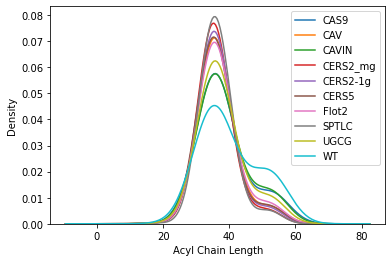

In [36]:
chart_list = []
i = 0
for protein in ptnstd['protein'].unique():
    source = ptnstd[ptnstd['protein'] == protein]
    
    # create error bars
    err = alt.Chart(source).mark_errorbar(extent='stdev').encode(
        x='Acyl Chain Length:Q',
        y='Fraction:Q',
    )
    
    # create histogram
    bar = alt.Chart(source).mark_bar().encode(
        x='Acyl Chain Length:Q',
        y=alt.Y('mean(Fraction):Q').scale(domain=[0,.26]),
    ).properties(title=protein)
    
    # create density plot
    x = ptns['Acyl Chain Length']
    y = ptns[protein]

    a = sns.kdeplot(x=x, weights=y, label=protein)
    plt.legend()
    
    x, y = a.lines[i].get_data()
    # print(len(a.lines))
    s = pd.DataFrame({'x':x, 'density':y})
    
    dens = alt.Chart(s).mark_line(color='red').encode(
        x=alt.X('x').scale(domain=[0,60], clamp=True).title('Acyl Chain Length'),
        y=alt.Y('density').title('density').scale(domain=[0,.1]),
        tooltip=['x','density']
    )
    
    # append to chart list
    chart = alt.layer(bar+err, dens).resolve_scale(y='independent')
    
    chart_list.append(chart)
    
    i +=1
    

side_by_side_err = alt.hconcat(*chart_list[:3]) & alt.hconcat(*chart_list[3:6]) & alt.hconcat(*chart_list[6:9]) & chart_list[9]

# side_by_side_err2 = alt.hconcat(*chart_list[:4]) & alt.hconcat(*chart_list[4:8]) & alt.hconcat(*chart_list[8:])

# side_by_side_err2

# Fit Gaussian

In [20]:
from __future__ import print_function 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit 

In [21]:
# # data
# x = ptns[(ptns['Acyl Chain Length'] % 2 == 0)]['Acyl Chain Length']
# y = ptns['CAS9'].loc[x.index]

# n = len(x)                          #the number of data
# mean = sum(x*y)/n                   #note this correction
# sigma = sum(y*(x-mean)**2)/n        #note this correction

# def gaus(x,a,x0,sigma):
#     return a*np.exp(-(x-x0)**2/(2*sigma**2))

# popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma])

# plt.plot(x,y,'b+:',label='data')
# plt.plot(x,gaus(x,*popt),'ro:',label='fit')
# plt.legend()
# plt.show()
# print(popt)

In [37]:
chart_list = []
i = 0
def gaus(x,a,x0,sigma):
        return a*np.exp(-(x-x0)**2/(2*sigma**2))
    
for protein in ptnstd['protein'].unique():
    source = ptnstd[ptnstd['protein'] == protein]
    
    # create error bars
    err = alt.Chart(source).mark_errorbar(extent='stdev').encode(
        x='Acyl Chain Length:Q',
        y='Fraction:Q',
    )
    
    # create histogram
    bar = alt.Chart(source).mark_bar().encode(
        x='Acyl Chain Length:Q',
        y=alt.Y('mean(Fraction):Q').scale(domain=[0,.26]),
    ).properties(title=protein)
    
    # create gaussian
    x = ptns[(ptns['Acyl Chain Length'] % 2 == 0)]['Acyl Chain Length']
    y = ptns[protein].loc[x.index]
    
    # expected vals
    n = len(x)                         
    mean = sum(x*y)/n                  
    sigma = sum(y*(x-mean)**2)/n 
    
    popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma])
    
    xx = np.linspace(10, 60, 500)
    
    s = pd.DataFrame({'Acyl Chain Length':xx, 'y':gaus(xx, *popt)})
    
    gauss = alt.Chart(s).mark_line(color='red').encode(
        x='Acyl Chain Length:Q',
        y='y:Q'
    )
    
    text = alt.Chart({'values':[{}]}).mark_text(
        align="left", baseline="top"
    ).encode(
        x=alt.value(5),  # pixels from left
        y=alt.value(5),  # pixels from top
        text=alt.value([f"a: {popt[0]:.3f}", f"mean: {popt[1]:.3f}", f"sigma: {popt[2]:.3f}"])
    )
    
    # append to chart list
    chart = bar + err + gauss + text
    
    chart_list.append(chart)
    
    i +=1
    

side_by_side_err = alt.hconcat(*chart_list[:3]) & alt.hconcat(*chart_list[3:6]) & alt.hconcat(*chart_list[6:9]) & chart_list[9]

side_by_side_err

# side_by_side_err2 = alt.hconcat(*chart_list[:4]) & alt.hconcat(*chart_list[4:8]) & alt.hconcat(*chart_list[8:])

# side_by_side_err2

alt.VConcatChart(...)

# Odds Only

In [23]:
odds_long = ptnstd[ptnstd['Acyl Chain Length'] % 2 != 0]
odds_long.head()

,protein,Acyl Chain Length,Fraction
320,CAS9,25,0.000121
321,CAS9,25,0.000118
322,CAS9,25,0.000154
323,CAS9,25,0.000133
324,CAV,25,0.000140


In [39]:
chart_list = []
for protein in odds_long['protein'].unique():
    source = odds_long[odds_long['protein'] == protein]
    
    # create error bars
    err = alt.Chart(source).mark_errorbar(extent='stdev').encode(
        x='Acyl Chain Length:Q',
        y='Fraction:Q',
    )
    
    # create histogram
    bar = alt.Chart(source).mark_bar().encode(
        x='Acyl Chain Length:Q',
        y=alt.Y('mean(Fraction):Q').scale(domain=[0,.04]),
    ).properties(title=protein)
    
    # append to chart list
    chart = bar + err
    
    chart_list.append(chart)
    
# odds_distribution = alt.hconcat(*chart_list[:3]) & alt.hconcat(*chart_list[3:6]) & alt.hconcat(*chart_list[6:9]) & chart_list[9]
# odds_distribution

odds_distribution2 = alt.hconcat(*chart_list[:4]) & alt.hconcat(*chart_list[4:8]) & alt.hconcat(*chart_list[8:])
odds_distribution2

alt.VConcatChart(...)

In [25]:
# create df with odd & even percentages (df_lengths is already normalized down the column)

# create Acyl Chain Length column
l_o = lengths.reset_index().rename(columns={'index':'Acyl Chain Length'})

# separate into odd & even
odds = l_o[l_o['Acyl Chain Length'] % 2 != 0]
evens = l_o[l_o['Acyl Chain Length'] % 2 == 0]

# find the odd & even percentages for each sample and add to df
df_odds = pd.concat([odds.sum()[1:], evens.sum()[1:]], axis=1, keys=['odd', 'even'])

# merge with df_exps to sort by protein rather than sample
df_odds = df_odds.reset_index().rename(columns={'index':'sample'})
df_odds = df_exps.merge(df_odds, on='sample').drop(columns=['sample'])

# drop RAJU
df_odds = df_odds[df_odds['protein'] != 'RAJU']

df_odds.head()

,protein,odd,even
0,CAS9,0.035729,0.964271
1,CAS9,0.049022,0.950978
2,CAS9,0.035899,0.964101
3,CAS9,0.055717,0.944283
4,CAV,0.026223,0.973777


In [26]:
# long version of df_odds
df_odds_long = df_odds.melt('protein')
df_odds_long.head()

,protein,variable,value
0,CAS9,odd,0.035729
1,CAS9,odd,0.049022
2,CAS9,odd,0.035899
3,CAS9,odd,0.055717
4,CAV,odd,0.026223


In [27]:
# create donut chart
chart_list = []

for ptn in df_odds_long['protein'].unique():
    source = df_odds_long[df_odds_long['protein'] == ptn]
    
    donut = alt.Chart(source).mark_arc().encode(
        theta='mean(value):Q',
        color='variable:N'
    ).properties(title={'text': [], 'subtitle':ptn})
    
    text 
    
    chart_list.append(donut)
    
o_donut = alt.hconcat(*chart_list[:3]) & alt.hconcat(*chart_list[3:6]) & alt.hconcat(*chart_list[6:9]) & chart_list[9]
o_donut = o_donut.properties(title={'text':['Percentage of Odd vs Even Chain Lengths']})
# o_donut

In [28]:
# fraction of odd chain lengths, bar graph
b = alt.Chart(df_odds).mark_bar().encode(
    x='protein:N',
    y='mean(odd):Q'
).properties(title='Fraction of Odd Chain Lengths')

# error bars
err = alt.Chart(df_odds).mark_errorbar(extent='stdev').encode(
    x='protein:N',
    y='odd:Q',
)

b + err

alt.LayerChart(...)

# Chain Lengths over 50

In [29]:
c = df_meta.merge(df, on="Sample Name")
c.head()

,Sample Name,Head Group,Acyl Chain Length,Unsaturation,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
0,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer,26,3,167.0000,143.0000,125.0000,132.0000,171.6091,182.9007,...,130.0000,142.0000,68.0529,46.4729,88.0000,91.0000,229.5233,278.1255,206.0000,182.0000
1,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer,26,2,53.2158,52.8015,47.4908,76.2783,27.6563,23.0569,...,0.0000,2.1176,47.2560,62.7063,11.1856,0.0000,10.8768,6.0672,0.0000,34.4747
2,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer,26,2,167.8122,131.3388,220.0689,128.3439,342.9760,331.4596,...,290.0353,223.3067,187.9922,219.2679,231.3212,219.2373,329.9421,313.2847,251.0406,226.8066
3,Hex2Cer 26:2;2 (LCB 18:0;2-H2O),Hex2Cer,26,2,54.0000,47.0000,39.0000,44.0000,74.0000,64.0000,...,44.0000,37.0000,48.6404,51.9843,38.9995,52.0000,62.0000,57.0000,51.0000,40.0000
4,Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),Hex2Cer,26,0,391.2240,326.4641,444.7720,385.3202,175.0126,296.5953,...,309.7805,272.9937,373.2111,292.2522,348.9607,348.3176,304.3199,271.4133,303.6544,253.3654


In [30]:
d = c[c['Acyl Chain Length'] >= 50]
d.head()

,Sample Name,Head Group,Acyl Chain Length,Unsaturation,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
2296,NAPE 50:3+NH4 (-FA 12:1 (NH4)),NAPE,50,3,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2297,NAPE 50:3+NH4 (-FA 12:3 (NH4)),NAPE,50,3,0.0,0.0,0.0,0.0,0.0,0.0,...,5759.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2298,NAPE 50:2+NH4 (-FA 12:0 (NH4)),NAPE,50,2,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2299,NAPE 50:2+NH4 (-FA 12:2 (NH4)),NAPE,50,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2300,NAPE 52:3+NH4 (-FA 12:0 (NH4)),NAPE,52,3,0.0,0.0,0.0,0.0,0.0,0.0,...,23.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# relative values of head groups for chain lengths over 50
d['Head Group'].value_counts(normalize=True)

MADAG    0.686047
TAG      0.281977
NAPE     0.031977
Name: Head Group, dtype: float64

# Fit Bimodal Gaussian

In [32]:
# from sklearn.mixture import GaussianMixture

In [33]:
# chart_list = []
# i = 0
# def gaus(x,a,x0,sigma):
#         return a*np.exp(-(x-x0)**2/(2*sigma**2))
    
# for protein in ptnstd['protein'].unique():
#     source = ptnstd[ptnstd['protein'] == protein]
    
#     # create error bars
#     err = alt.Chart(source).mark_errorbar(extent='stdev').encode(
#         x='Acyl Chain Length:Q',
#         y='Fraction:Q',
#     )
    
#     # create histogram
#     bar = alt.Chart(source).mark_bar().encode(
#         x='Acyl Chain Length:Q',
#         y=alt.Y('mean(Fraction):Q').scale(domain=[0,.26]),
#     ).properties(title=protein)
    
#     # create gaussian; exclude odd-number chains
#     x = ptns[(ptns['Acyl Chain Length'] % 2 == 0)]['Acyl Chain Length']
#     y = ptns[protein].loc[x.index]
    
#     # expected vals
#     gmm = GaussianMixture(n_components=3, covariance_type="full", tol=0.001)
#     gmm = gmm.fit(X=np.expand_dims(samples, 1))
    
#     # Evaluate GMM
#     gmm_x = np.linspace(-2, 1.5, 5000)
#     gmm_y = np.exp(gmm.score_samples(gmm_x.reshape(-1, 1)))
    
#     s = pd.DataFrame({'Acyl Chain Length':xx, 'y':gaus(xx, *popt)})
    
#     gauss = alt.Chart(s).mark_line(color='red').encode(
#         x='Acyl Chain Length:Q',
#         y='y:Q'
#     )
    
#     text = alt.Chart({'values':[{}]}).mark_text(
#         align="left", baseline="top"
#     ).encode(
#         x=alt.value(5),  # pixels from left
#         y=alt.value(5),  # pixels from top
#         text=alt.value([f"a: {popt[0]:.3f}", f"mean: {popt[1]:.3f}", f"sigma: {popt[2]:.3f}"])
#     )
    
#     # append to chart list
#     chart = bar + err + gauss + text
    
#     chart_list.append(chart)
    
#     i +=1
    

# side_by_side_err = alt.hconcat(*chart_list[:3]) & alt.hconcat(*chart_list[3:6]) & alt.hconcat(*chart_list[6:9]) & chart_list[9]

# side_by_side_err

# Save Graphs

In [38]:
# side_by_side_err.save('graphs/pos_mode_whole_dataset/updated_ChainLengthByProtein_SideBySide_interactive.html')

# grouped_err.save('graphs/pos_mode_whole_dataset/chain_length_graphs/updated_ChainLengthByProtein_GroupedBarGraph_interactive.html')

# save layered density plot
# a.get_figure().savefig('graphs/pos_mode_whole_dataset/layered_density_plots.jpg')